In [10]:
import pandas as pd

In [11]:
resenha = pd.read_csv('imdb-reviews-pt-br.csv')
resenha.tail()

,id,text_en,text_pt,sentiment
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos
49458,49460,Working-class romantic drama from director Mar...,O drama romântico da classe trabalhadora do di...,pos


In [12]:
from sklearn.model_selection import train_test_split

treino, teste, classe_treino, classe_teste = train_test_split(resenha.text_pt,
                                                              resenha.sentiment,
                                                              random_state = 42)

In [13]:
# from sklearn.linear_model import LogisticRegression

# """ 
# LogisticRegression calcula a probabilidade de uma instância pertencer a uma classe ou outra, usando binarização.
# """

# regressao_logistica = LogisticRegression()
# regressao_logistica.fit(treino, classe_treino)
# acuracia = regressao_logistica.score(teste, classe_teste)
# acuracia

In [14]:
print(resenha.sentiment.value_counts())

sentiment
neg    24765
pos    24694
Name: count, dtype: int64


In [15]:
classificacao = resenha["sentiment"].replace(["neg", "pos"], [0,1])

/tmp/ipykernel_18455/2901019554.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  classificacao = resenha["sentiment"].replace(["neg", "pos"], [0,1])


In [16]:
resenha["classificacao"] = classificacao
resenha

,id,text_en,text_pt,sentiment,classificacao
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0
...,...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1


In [17]:
from sklearn.feature_extraction.text import CountVectorizer

texto = ['Assisti um filme otimo','Assisti filme ruim']

vetorizar = CountVectorizer(lowercase=False)
bag_of_words = vetorizar.fit_transform(texto)


In [18]:
vetorizar.get_feature_names_out()

array(['Assisti', 'filme', 'otimo', 'ruim', 'um'], dtype=object)

In [19]:
bag_of_words

<2x5 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [20]:
# transforma minha matriz esparsa em um dataframe
matriz = pd.DataFrame.sparse.from_spmatrix(bag_of_words, 
                                           columns=vetorizar.get_feature_names_out())

In [21]:
matriz

,Assisti,filme,otimo,ruim,um
0,1,1,1,0,1
1,1,1,0,1,0


In [22]:
vetorizar = CountVectorizer(lowercase=False, max_features=50) 
bag_of_words = vetorizar.fit_transform(resenha['text_pt'])
bag_of_words.shape

(49459, 50)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words,
                                                              resenha.classificacao,
                                                              random_state = 42)


regressao_logistica = LogisticRegression()
regressao_logistica.fit(treino, classe_treino)
acuracia = regressao_logistica.score(teste, classe_teste)
acuracia

0.6583097452486858

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

def classificar_texto(texto, coluna_texto, coluna_classificacao):
    vetorizar = CountVectorizer(lowercase=False, max_features=50) 
    bag_of_words = vetorizar.fit_transform(texto[coluna_texto])
    treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words,
                                                                texto[coluna_classificacao],
                                                                random_state = 42)


    regressao_logistica = LogisticRegression()
    regressao_logistica.fit(treino, classe_treino)
    acuracia = regressao_logistica.score(teste, classe_teste)
    return acuracia

print(classificar_texto(resenha, "text_pt", "classificacao"))

0.6583097452486858


In [25]:
todas_palavras = ' '.join([texto for texto in resenha.text_pt])
# len(todas_palavras)

In [26]:
# word cloud
%matplotlib inline
from wordcloud import WordCloud

nuvem_palavras = WordCloud(width=800, height=500,
                           max_font_size=110, collocations=False).generate(todas_palavras)

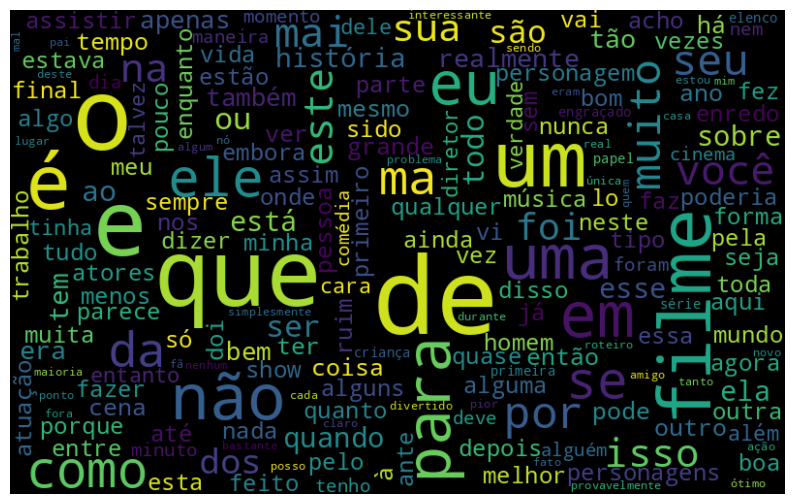

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis('off')
plt.show()


In [28]:
resenha.query("sentiment == 'pos'")

,id,text_en,text_pt,sentiment,classificacao
12389,12391,I went and saw this movie last night after bei...,Eu fui e vi este filme ontem à noite depois de...,pos,1
12390,12392,Actor turned director Bill Paxton follows up h...,"O diretor do ator, Bill Paxton, segue sua prom...",pos,1
12391,12393,As a recreational golfer with some knowledge o...,Como um jogador de recreio com algum conhecime...,pos,1
12392,12394,"I saw this film in a sneak preview, and it is ...","Eu vi esse filme em uma prévia, e é delicioso....",pos,1
12393,12395,Bill Paxton has taken the true story of the 19...,Bill Paxton levou a verdadeira história do gol...,pos,1
...,...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1


In [29]:
def nuvem_palavras_neg(texto, coluna_texto):
    texto_negativo = texto.query("sentiment == 'neg'")
    todas_palavras = ' '.join([texto for texto in texto_negativo[coluna_texto]])
    nuvem_palavras = WordCloud(width=800, height=500,
                            max_font_size=110, collocations=False).generate(todas_palavras)
    
    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [30]:
def nuvem_palavras_pos(texto, coluna_texto):
    texto_positivo = texto.query("sentiment == 'pos'")
    todas_palavras = ' '.join([texto for texto in texto_positivo[coluna_texto]])
    nuvem_palavras = WordCloud(width=800, height=500,
                            max_font_size=110, collocations=False).generate(todas_palavras)
    
    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis('off')
    plt.show()

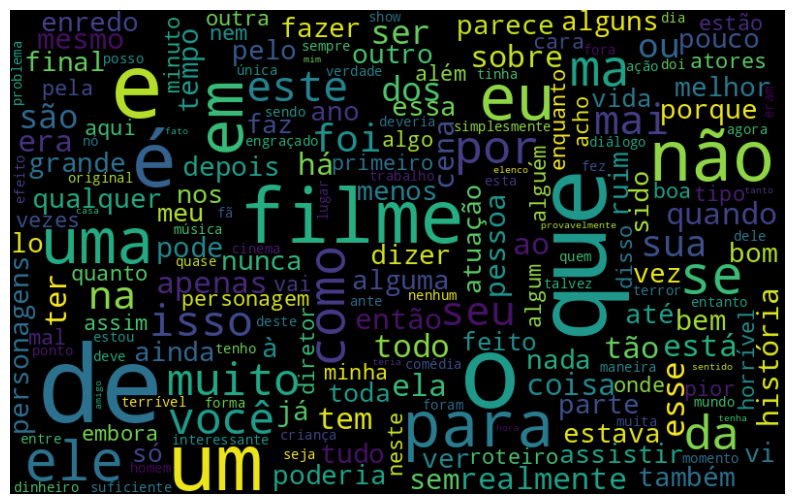

In [31]:
nuvem_palavras_neg(resenha, "text_pt")

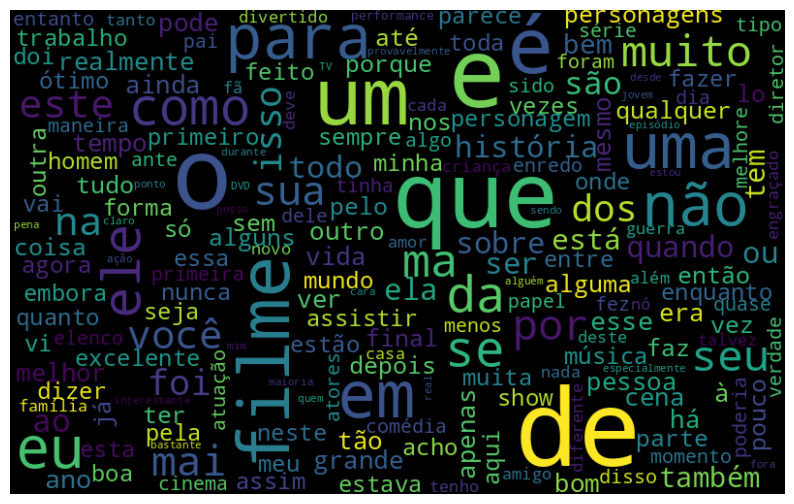

In [32]:
nuvem_palavras_pos(resenha, "text_pt")

In [33]:
import nltk
# nltk.download()
a = ['um filme ruim', 'um filme bom']
frequencia = nltk.FreqDist(a)
frequencia

FreqDist({'um filme ruim': 1, 'um filme bom': 1})

In [34]:
from nltk import tokenize

frase = 'bem vindo ao mundo pln'

token_espaco =  tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(frase)
token_frase

['bem', 'vindo', 'ao', 'mundo', 'pln']

In [35]:
token_frase = token_espaco.tokenize(todas_palavras)
frequencia = nltk.FreqDist(token_frase)

In [36]:
df_frequencia = pd.DataFrame({'Palavra': list(frequencia.keys()),
                              'Frequencia': list(frequencia.values())})

In [37]:
df_frequencia.nlargest(columns='Frequencia', n = 10)

,Palavra,Frequencia
20,de,417651
14,que,325070
42,e,299743
3,o,244881
7,um,216410
102,a,210179
45,é,192381
200,em,132778
1,uma,130888
29,não,127915


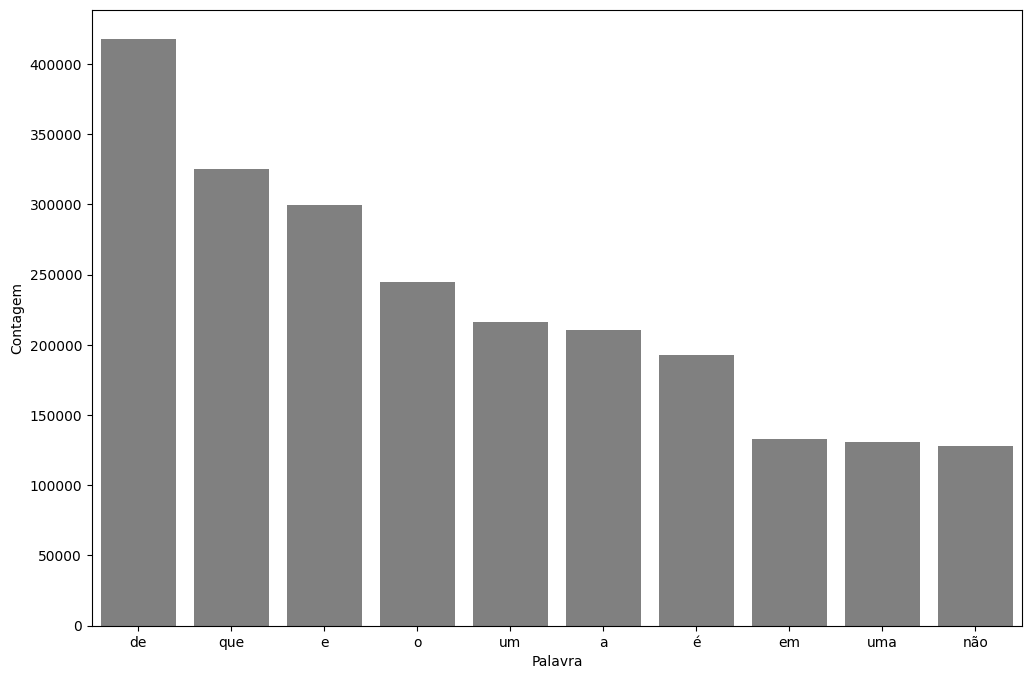

In [38]:
import seaborn as sns

plt.figure(figsize=(12, 8))
ax = sns.barplot(data = df_frequencia.nlargest(columns='Frequencia', n = 10), x = 'Palavra', y = 'Frequencia', color = 'gray')
ax.set(ylabel = 'Contagem')
plt.show()